In [3]:
import os
from shutil import copyfile
import random
import shutil
from google.colab import files
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, GlobalAveragePooling2D
from sklearn.datasets import load_files


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/real time face mask detection /Dataset/train"


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))



Found 1322 images belonging to 2 classes.


In [ ]:
VALIDATION_DIR = "/content/drive/MyDrive/real time face mask detection /Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 194 images belonging to 2 classes.


In [ ]:
model =Sequential([
    Conv2D(120, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(80, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


In [ ]:
labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [ ]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

<ipython-input-92-6272b23e5a0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
133/133 [==============================] - ETA: 0s - loss: 0.4815 - acc: 0.7678

133/133 [==============================] - 190s 1s/step - loss: 0.4815 - acc: 0.7678 - val_loss: 0.2437 - val_acc: 0.9227
Epoch 2/10
133/133 [==============================] - ETA: 0s - loss: 0.3161 - acc: 0.8790

133/133 [==============================] - 220s 2s/step - loss: 0.3161 - acc: 0.8790 - val_loss: 0.1221 - val_acc: 0.9588
Epoch 3/10
133/133 [==============================] - 181s 1s/step - loss: 0.2945 - acc: 0.8828 - val_loss: 0.1949 - val_acc: 0.8969
Epoch 4/10
133/133 [==============================] - 184s 1s/step - loss: 0.2624 - acc: 0.9077 - val_loss: 0.1235 - val_acc: 0.9742
Epoch 5/10
133/133 [==============================] - ETA: 0s - loss: 0.2571 - acc: 0.9168

133/133 [==============================] - 181s 1s/step - loss: 0.2571 - acc: 0.9168 - val_loss: 0.1203 - val_acc: 0.9485
Epoch 6/10
133/133 [==============================] - ETA: 0s - loss: 0.2392 - acc: 0.9085

133/133 [==============================] - 177s 1s/step - loss: 0.2392 - acc: 0.9085 - val_loss: 0.0476 - val_acc: 0.9897
Epoch 7/10
133/133 [==============================] - 172s 1s/step - loss: 0.2575 - acc: 0.9032 - val_loss: 0.0629 - val_acc: 0.9742
Epoch 8/10
133/133 [==============================] - 180s 1s/step - loss: 0.2048 - acc: 0.9228 - val_loss: 0.1456 - val_acc: 0.9175
Epoch 9/10
133/133 [==============================] - 173s 1s/step - loss: 0.2361 - acc: 0.9153 - val_loss: 0.1866 - val_acc: 0.9072
Epoch 10/10
133/133 [==============================] - 176s 1s/step - loss: 0.1647 - acc: 0.9349 - val_loss: 0.0971 - val_acc: 0.9433


saving model to my own device for later use without training 

In [ ]:
model.save('/content/drive/MyDrive/real time face mask detection/model2.h5')

In [ ]:
model_name = "D:/Computer vision/real_face_mask/model.h5"


In [ ]:
from tensorflow.keras.models import load_model 
loded_model = load_model(model_name ,compile =False  )

In [ ]:
import cv2
import numpy as np


In [ ]:
classifier = cv2.CascadeClassifier('C:/Users/FreeComp/Downloads/haarcascade_frontalface_default.xml')

In [ ]:
labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

In [ ]:
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=loded_model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

In [1]:
TRAINING_DIR = "/content/drive/MyDrive/real time face mask detection /Dataset/train"


In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(48, 48),shuffle=False)

Found 1322 images belonging to 2 classes.


In [7]:
TEST_DIR = "/content/drive/MyDrive/real time face mask detection /Dataset/test"


In [8]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(48, 48),shuffle=False)

Found 194 images belonging to 2 classes.


In [9]:
train_images, train_labels = train_generator.next()
test_images, test_labels = test_generator.next()
print(type(train_images))
print(type(train_labels))
print(train_images.shape)
print(train_labels.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32, 48, 48, 3)
(32, 2)


In [21]:
def DenseNet121(input_shape = (224, 224, 3), classes = 2):
    
  # Create an instance of a pre-trained model - DenseNet121
  base_model = tf.keras.applications.DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')

  # Freeze the top layers of the pre-trained model
  for layer in base_model.layers:
      layer.trainable = False

  # Add a dense layer and dropout layer
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  predictions = Dense(classes, activation='softmax')(x)

  # Create the  model
  model = Model(inputs=base_model.input, outputs=predictions)

  # Compile the model
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

model = DenseNet121()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.687516 to fit



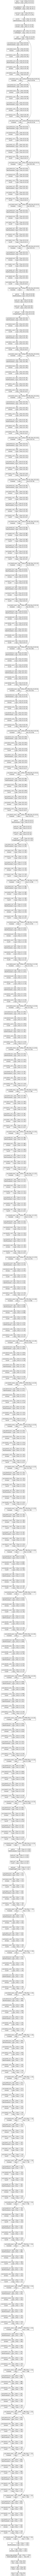

In [22]:
tf.keras.utils.plot_model(model, to_file='model_3.png', show_shapes=True, show_layer_names=True)


In [12]:
# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    batch_size=10,
                    validation_data=test_generator,
                    callbacks=[early_stop])

Epoch 1/15
42/42 [==============================] - 299s 7s/step - loss: 0.8054 - accuracy: 0.6823 - val_loss: 0.2714 - val_accuracy: 0.9124
Epoch 2/15
42/42 [==============================] - 21s 507ms/step - loss: 0.3172 - accuracy: 0.8714 - val_loss: 0.1928 - val_accuracy: 0.9278
Epoch 3/15
42/42 [==============================] - 25s 588ms/step - loss: 0.2465 - accuracy: 0.8994 - val_loss: 0.1963 - val_accuracy: 0.9381
Epoch 4/15
42/42 [==============================] - 23s 541ms/step - loss: 0.1974 - accuracy: 0.9244 - val_loss: 0.1691 - val_accuracy: 0.9330
Epoch 5/15
42/42 [==============================] - 25s 592ms/step - loss: 0.1675 - accuracy: 0.9387 - val_loss: 0.1885 - val_accuracy: 0.9433
Epoch 6/15
42/42 [==============================] - 21s 509ms/step - loss: 0.1471 - accuracy: 0.9470 - val_loss: 0.1132 - val_accuracy: 0.9536
Epoch 7/15
42/42 [==============================] - 26s 617ms/step - loss: 0.1257 - accuracy: 0.9569 - val_loss: 0.1136 - val_accuracy: 0.9536
E

In [13]:
model.save('/content/drive/MyDrive/real time face mask detection/DenseNet121.h5')

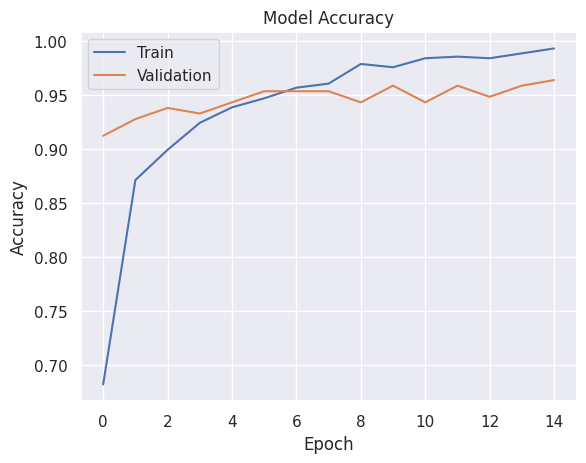

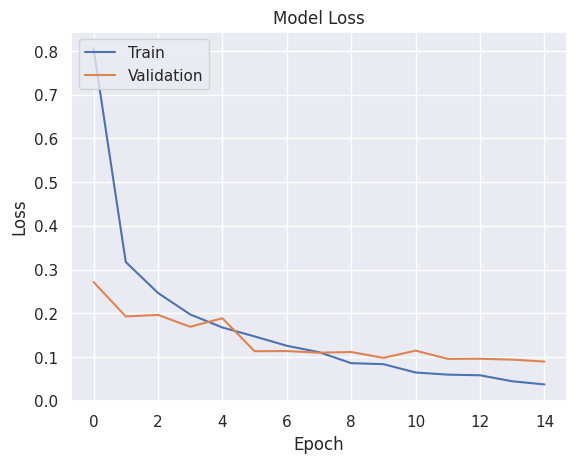

In [14]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
test_generator.reset()
y_pred = model.predict(test_generator)
y_true = test_generator.classes

7/7 [==============================] - 6s 259ms/step


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,  y_pred.argmax(axis=1))
#test accuracy

0.9639175257731959

In [17]:
from sklearn.metrics import classification_report

test_generator.reset()
y_pred = model.predict(test_generator)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred.argmax(axis=1), target_names=class_labels))

7/7 [==============================] - 5s 682ms/step
              precision    recall  f1-score   support

   with_mask       0.97      0.96      0.96        97
without_mask       0.96      0.97      0.96        97

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [18]:
train_generator.reset()
y_pred2 = model.predict(train_generator)
y_true2 = train_generator.classes
     

42/42 [==============================] - 36s 860ms/step


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true2,  y_pred2.argmax(axis=1))
#train accuracy 
     

0.9962178517397882

In [20]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report

train_generator.reset()
y_pred2 = model.predict(train_generator)
y_true2 = train_generator.classes
class_labels = list(train_generator.class_indices.keys())
print(classification_report(y_true2, y_pred2.argmax(axis=1), target_names=class_labels))

42/42 [==============================] - 24s 546ms/step
              precision    recall  f1-score   support

   with_mask       1.00      0.99      1.00       662
without_mask       0.99      1.00      1.00       660

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



In [23]:
def vgg16(input_shape = (224, 224, 3), classes = 2):
    
  # Create an instance of pre-trained mobile net model
  base_model = tf.keras.applications.VGG16(input_shape=input_shape,
                                                include_top=False,
                                                weights='imagenet')

  # Add dense, dropout and batch normalization layers on the pre-trained model
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  predictions = Dense(classes, activation='softmax')(x)

  # Create final output layer with Sigmoid activation function
  model = Model(inputs=base_model.input, outputs=predictions)

  # Change batch size, activation function and optimize as rmsprop
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

  return model

model_vgg16 = vgg16()
model_vgg16.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

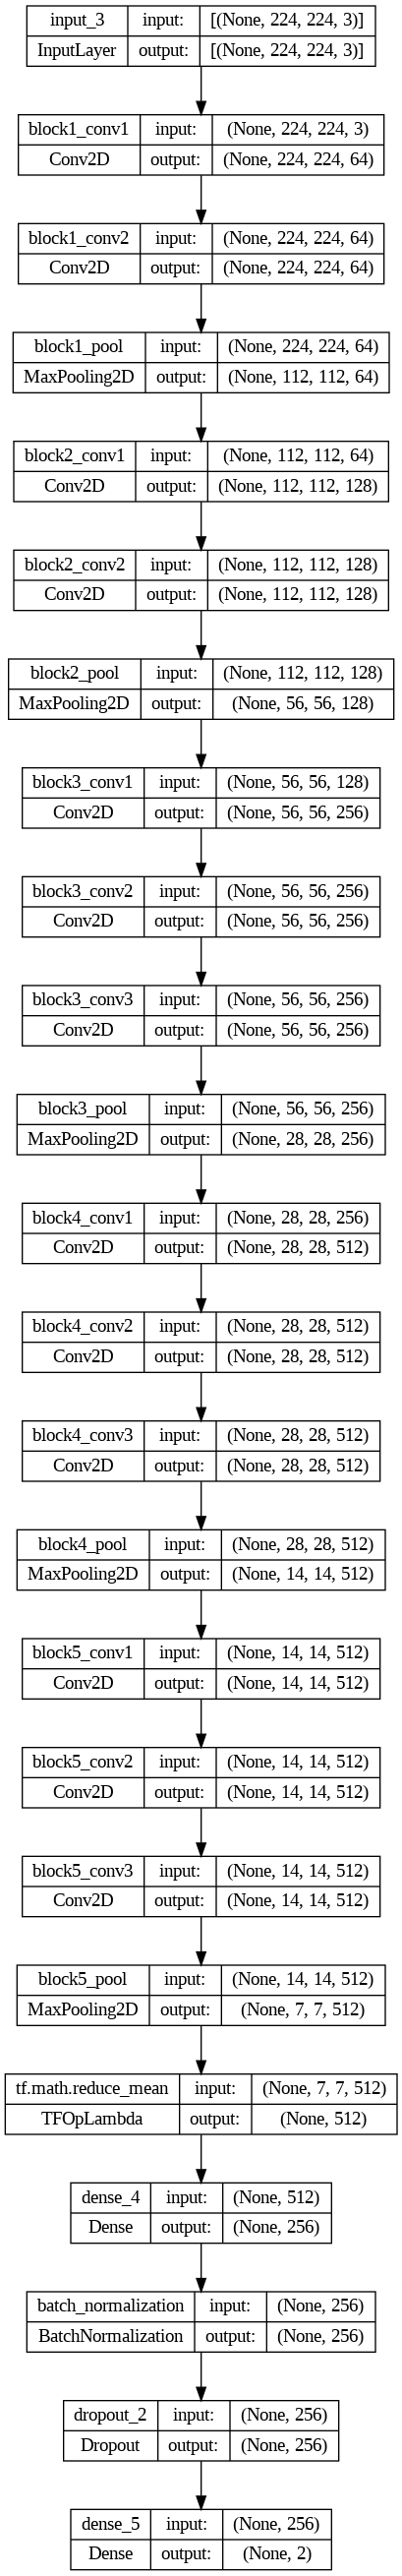

In [24]:
tf.keras.utils.plot_model(model_vgg16, to_file='model_4.png', show_shapes=True, show_layer_names=True)


In [25]:
# Use early stopping with the patience of two epoch and call back function for preventing overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Train the model using a generator and test accuracy of test data at every epoch
history = model_vgg16.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=test_generator,
        validation_steps=test_generator.samples // test_generator.batch_size,
        callbacks=[early_stopping])

<ipython-input-25-ecfa5a9c9980>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg16.fit_generator(


Epoch 1/10
41/41 [==============================] - 210s 5s/step - loss: 0.8104 - accuracy: 0.4930 - val_loss: 11.6924 - val_accuracy: 0.4948
Epoch 2/10
41/41 [==============================] - 202s 5s/step - loss: 0.7748 - accuracy: 0.4953 - val_loss: 1.8360 - val_accuracy: 0.4948
Epoch 3/10
41/41 [==============================] - 204s 5s/step - loss: 0.7825 - accuracy: 0.4628 - val_loss: 2.6874 - val_accuracy: 0.4688
Epoch 4/10
41/41 [==============================] - 197s 5s/step - loss: 0.7763 - accuracy: 0.4868 - val_loss: 0.7080 - val_accuracy: 0.5208
Epoch 5/10
41/41 [==============================] - 200s 5s/step - loss: 0.7612 - accuracy: 0.4829 - val_loss: 1.1284 - val_accuracy: 0.4948
Epoch 6/10
41/41 [==============================] - 198s 5s/step - loss: 0.7653 - accuracy: 0.4690 - val_loss: 1.9762 - val_accuracy: 0.4948


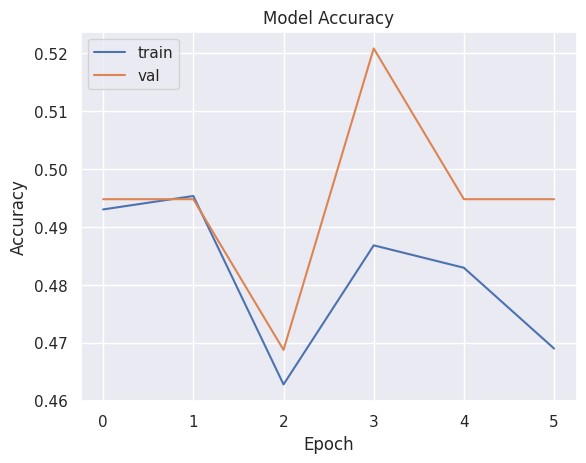

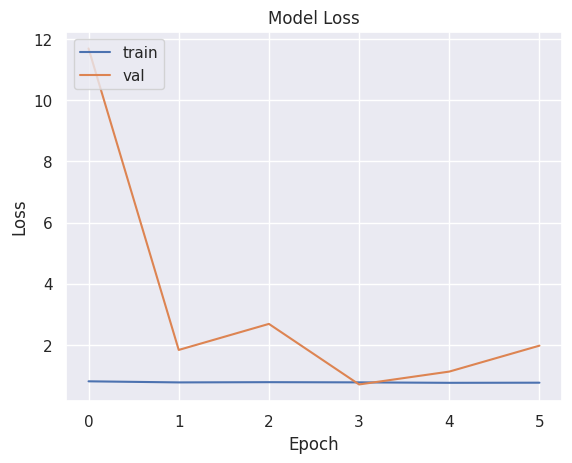

In [26]:
# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
# Print precision, recall, and F1-score for all classes

test_generator.reset()
y_pred4 = model.predict(test_generator)
y_true4 = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true4, y_pred4.argmax(axis=1), target_names=class_labels))

7/7 [==============================] - 8s 262ms/step
              precision    recall  f1-score   support

   with_mask       0.43      0.72      0.54        97
without_mask       0.16      0.05      0.08        97

    accuracy                           0.39       194
   macro avg       0.29      0.39      0.31       194
weighted avg       0.29      0.39      0.31       194

